In [ ]:
import pandas as pd

df = pd.read_csv('australia-population-vs-gdp(in).csv', encoding='ascii')
print(df.iloc[0:20])

    Year          GDP  Population    Country Code
0   1960  1810.597443    10276477  Australia  AUS
1   1961  1877.600224    10483000  Australia  AUS
2   1962  1854.641890    10742000  Australia  AUS
3   1963  1967.108991    10950000  Australia  AUS
4   1964  2131.380300    11167000  Australia  AUS
5   1965  2281.011956    11388000  Australia  AUS
6   1966  2343.819790    11651000  Australia  AUS
7   1967  2580.110592    11799000  Australia  AUS
8   1968  2724.130672    12009000  Australia  AUS
9   1969  2991.385947    12263000  Australia  AUS
10  1970  3304.837820    12507000  Australia  AUS
11  1971  3495.141627    12937000  Australia  AUS
12  1972  3949.372987    13177000  Australia  AUS
13  1973  4770.618658    13380000  Australia  AUS
14  1974  6482.831082    13723000  Australia  AUS
15  1975  7003.744180    13893000  Australia  AUS
16  1976  7486.592781    14033000  Australia  AUS
17  1977  7775.496821    14192000  Australia  AUS
18  1978  8252.655904    14358000  Australia  AUS


In [ ]:
print("\nSummary Statistics for Categorical Attributes:")
print(df.describe(include='object'))


Summary Statistics for Categorical Attributes:
          Country Code
count          63   63
unique          1    1
top     Australia  AUS
freq           63   63


In [ ]:
# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
Year                 0
GDP                  0
Population           0
Country              0
Code                 0
Population_Growth    1
GDP_Growth           1
dtype: int64


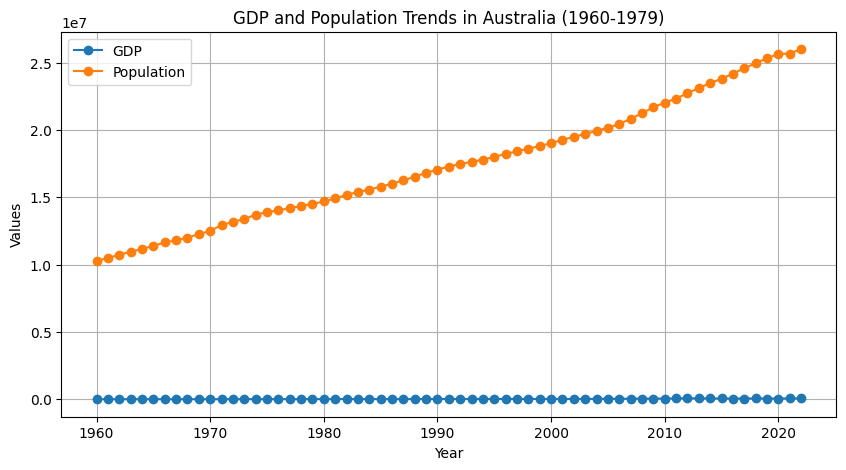

In [ ]:
import matplotlib.pyplot as plt

# Plotting GDP and Population trends
plt.figure(figsize=(10, 5), facecolor='white')
plt.plot(df['Year'], df['GDP'], label='GDP', marker='o')
plt.plot(df['Year'], df['Population'], label='Population', marker='o')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('GDP and Population Trends in Australia (1960-1979)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Calculate the population growth by year
df['Population Growth'] = df['Population'].diff()

# Display the population growth by year
population_growth_by_year = df[['Year', 'Population Growth']]
print(population_growth_by_year)

    Year  Population Growth
0   1960                NaN
1   1961           206523.0
2   1962           259000.0
3   1963           208000.0
4   1964           217000.0
..   ...                ...
58  2018           370670.0
59  2019           371568.0
60  2020           314422.0
61  2021            36164.0
62  2022           320128.0

[63 rows x 2 columns]


In [ ]:
import pandas as pd

df = pd.read_csv('australia-population-vs-gdp(in).csv', encoding='ascii')

df['Population_Growth'] = df['Population'].diff()
df['GDP_Growth'] = df['GDP'].diff()

correlation = df[['Population_Growth', 'GDP_Growth']].corr().iloc[0, 1]
print('Correlation between GDP growth and population growth:', correlation)
print(df[['Year', 'Population_Growth', 'GDP_Growth']].head(20))

Correlation between GDP growth and population growth: -0.03893358585016785
    Year  Population_Growth   GDP_Growth
0   1960                NaN          NaN
1   1961           206523.0    67.002781
2   1962           259000.0   -22.958334
3   1963           208000.0   112.467101
4   1964           217000.0   164.271309
5   1965           221000.0   149.631656
6   1966           263000.0    62.807834
7   1967           148000.0   236.290802
8   1968           210000.0   144.020080
9   1969           254000.0   267.255275
10  1970           244000.0   313.451873
11  1971           430000.0   190.303807
12  1972           240000.0   454.231360
13  1973           203000.0   821.245671
14  1974           343000.0  1712.212424
15  1975           170000.0   520.913098
16  1976           140000.0   482.848601
17  1977           159000.0   288.904040
18  1978           166000.0   477.159083
19  1979           156000.0  1041.703343


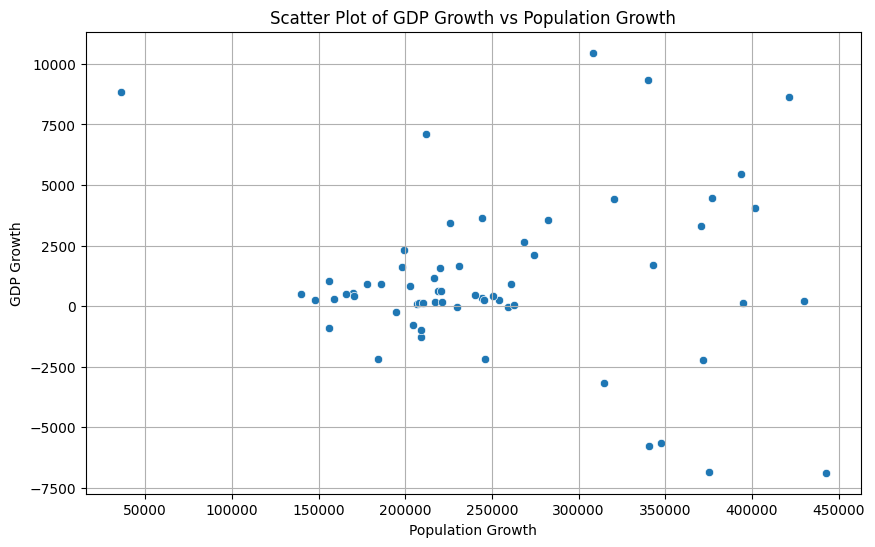

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('australia-population-vs-gdp(in).csv', encoding='ascii')

# Calculate the differences to get growth values
df['Population_Growth'] = df['Population'].diff()
df['GDP_Growth'] = df['GDP'].diff()

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Population_Growth', y='GDP_Growth')
plt.title('Scatter Plot of GDP Growth vs Population Growth')
plt.xlabel('Population Growth')
plt.ylabel('GDP Growth')
plt.grid(True)
plt.show()

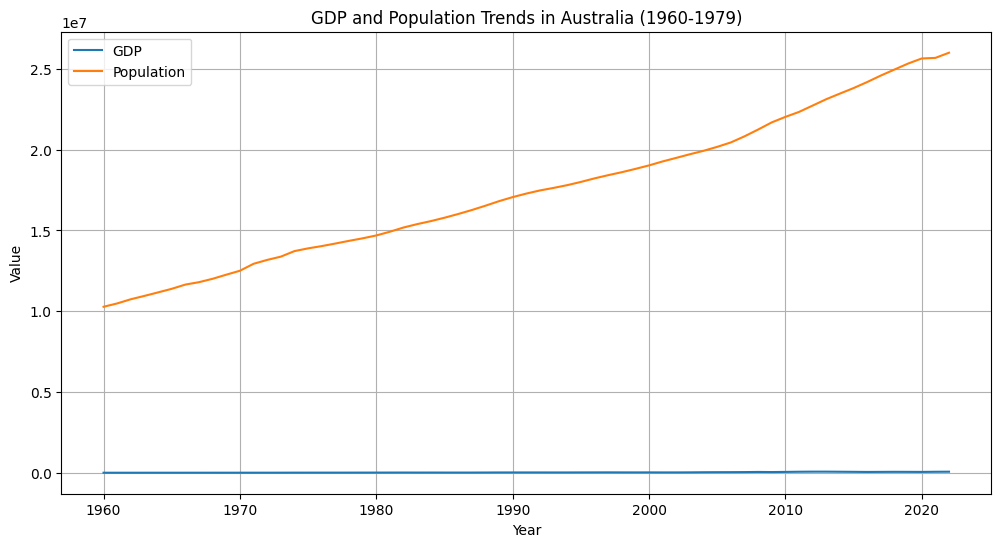

In [ ]:
import matplotlib.pyplot as plt

# Plotting GDP and Population trends
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['GDP'], label='GDP')
plt.plot(df['Year'], df['Population'], label='Population')
plt.title('GDP and Population Trends in Australia (1960-1979)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

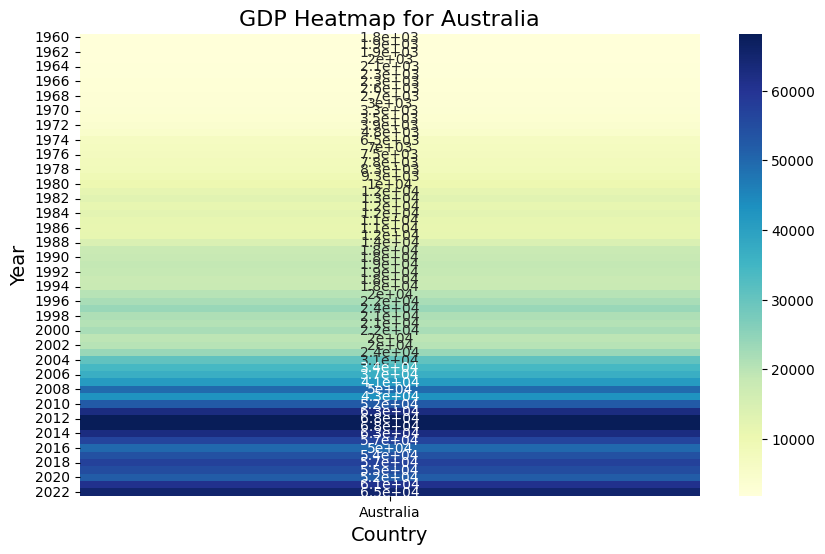

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('australia-population-vs-gdp(in).csv')

# Create a pivot table
pivot_table = data.pivot_table(index='Year', columns='Country', values='GDP')

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu')
plt.title('GDP Heatmap for Australia', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Year', fontsize=14)
plt.show()

<ipython-input-8-d1a04d789c6a>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


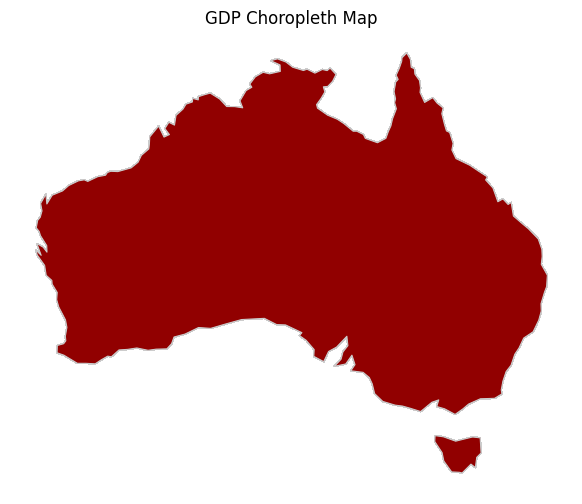

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load world shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge with GDP data
world = world.merge(data, how='left', left_on='name', right_on='Country')

# Plot choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
world.plot(column='GDP', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
plt.title('GDP Choropleth Map')
plt.show()




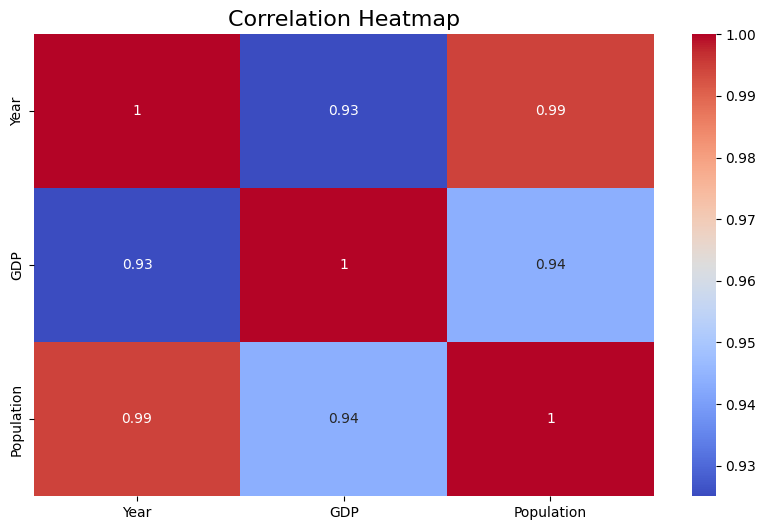

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude non-numeric columns like 'Country'
numeric_data = data.select_dtypes(include='number')

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Create correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


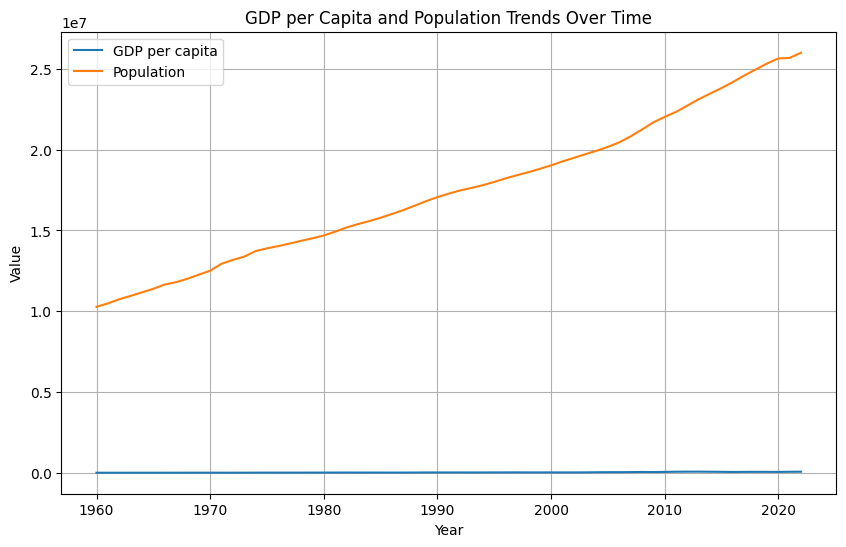

In [ ]:
import matplotlib.pyplot as plt

# Plot GDP per capita and population indicators over time
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['GDP'], label='GDP per capita')
plt.plot(df['Year'], df['Population'], label='Population')
plt.title('GDP per Capita and Population Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


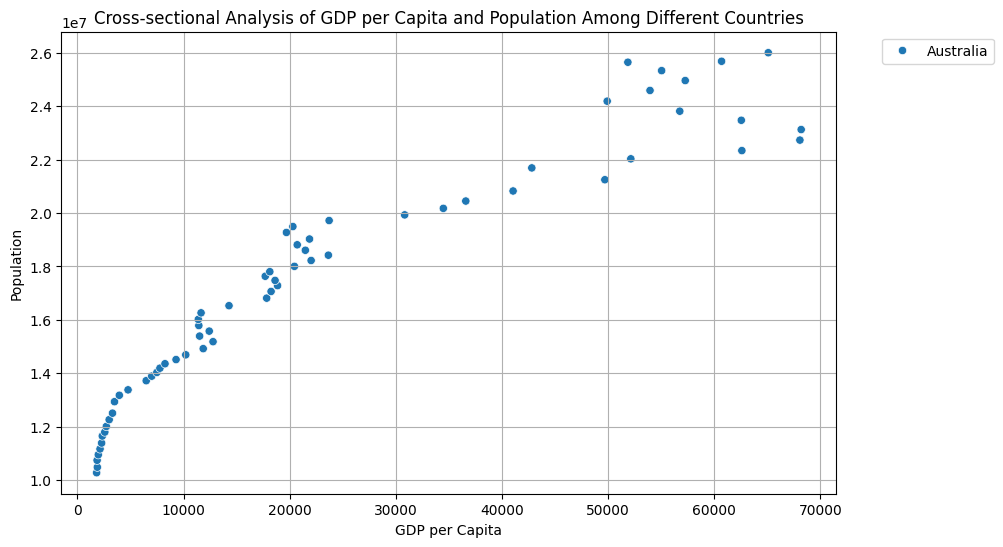

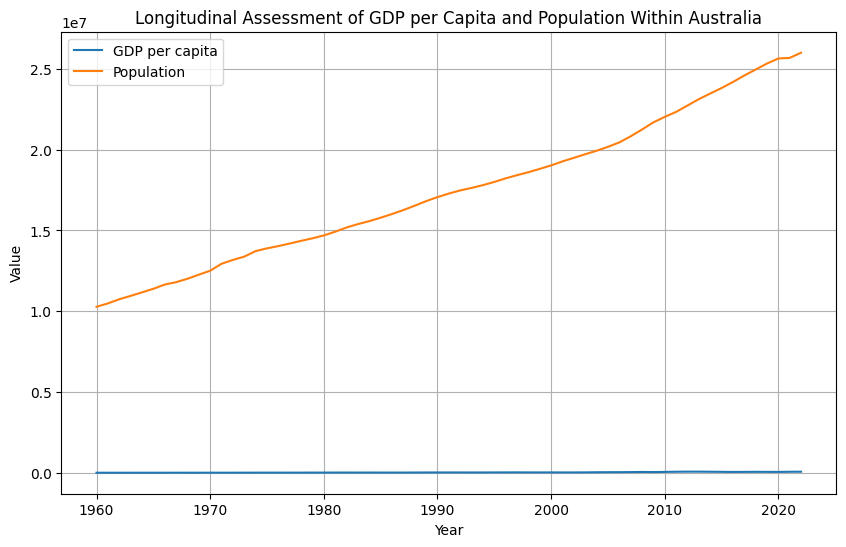

In [ ]:
import seaborn as sns

# Create a scatter plot comparing GDP per capita and population indicators among different countries
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='GDP', y='Population', hue='Country')
plt.title('Cross-sectional Analysis of GDP per Capita and Population Among Different Countries')
plt.xlabel('GDP per Capita')
plt.ylabel('Population')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Create a line plot to examine longitudinal assessments within Australia
australia_data = df[df['Country'] == 'Australia']
plt.figure(figsize=(10, 6))
plt.plot(australia_data['Year'], australia_data['GDP'], label='GDP per capita')
plt.plot(australia_data['Year'], australia_data['Population'], label='Population')
plt.title('Longitudinal Assessment of GDP per Capita and Population Within Australia')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


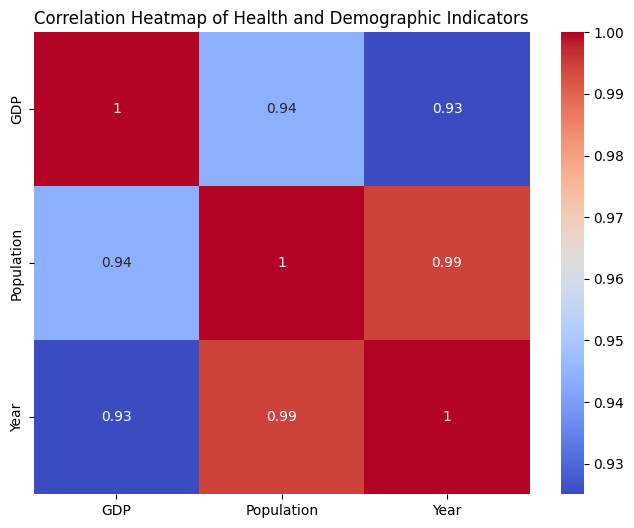

In [ ]:
# Create a heatmap to visualize the correlation matrix of health and demographic indicators
correlation_matrix = df[['GDP', 'Population', 'Year']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Health and Demographic Indicators')
plt.show()


In [ ]:
# Calculate correlation matrix
correlation_matrix = df[['GDP', 'Population']].corr()
print(correlation_matrix)


                 GDP  Population
GDP         1.000000    0.943603
Population  0.943603    1.000000


In [ ]:
from sklearn.linear_model import LinearRegression

# Fit linear regression model
X = df[['GDP']]
y = df['Population']
model = LinearRegression()
model.fit(X, y)

# Print coefficients
print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_)


Intercept: 12684500.043665854
Coefficient: [202.45025404]


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test for stationarity
result = adfuller(df['GDP'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: 0.11289876929294716
p-value: 0.9669307984514904


In [ ]:
from scipy.stats import f_oneway

# Perform one-way ANOVA
group1 = df[df['Country'] == 'Country1']['GDP']
group2 = df[df['Country'] == 'Country2']['GDP']
group3 = df[df['Country'] == 'Country3']['GDP']
f_statistic, p_value = f_oneway(group1, group2, group3)
print('F-statistic:', f_statistic)
print('p-value:', p_value)


F-statistic: nan
p-value: nan


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


In [ ]:
from scipy.stats import chi2_contingency

# Perform chi-square test for independence
contingency_table = pd.crosstab(df['GDP'], df['Population'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print('Chi-square statistic:', chi2_stat)
print('p-value:', p_value)


Chi-square statistic: 3906.000000000002
p-value: 0.23856265157033976


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


Mean Squared Error: 394199317.68


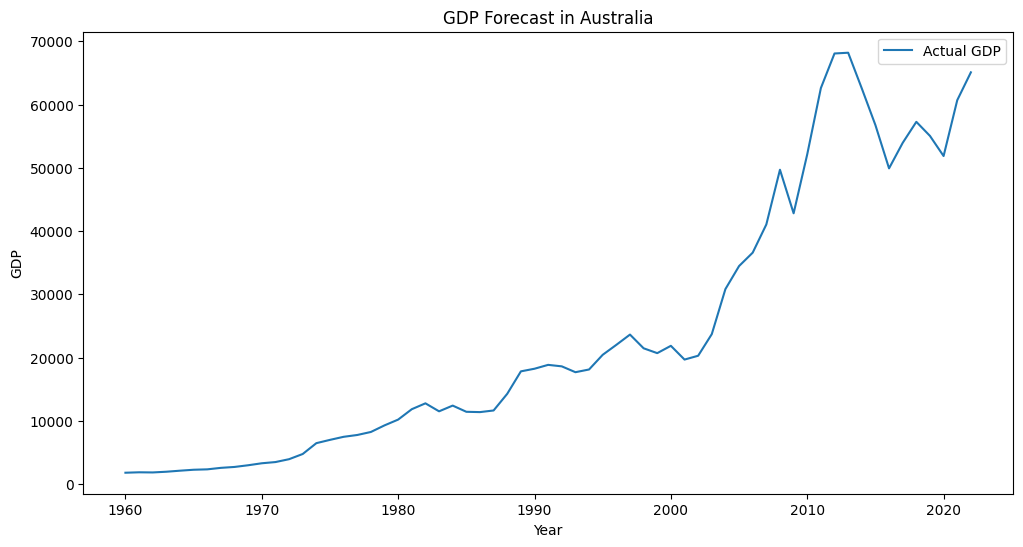

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the data
data = pd.read_csv('australia-population-vs-gdp(in).csv')

# Convert the 'Year' column to a datetime index
data.index = pd.to_datetime(data['Year'], format='%Y')

# Create a time series for GDP
gdp_series = data['GDP']

# Split the data into training and test sets
train_size = int(len(gdp_series) * 0.8)
train_data = gdp_series[:train_size]
test_data = gdp_series[train_size:]

# Fit the ARIMA model to the training data
model = ARIMA(train_data, order=(1, 1, 1))
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.forecast(steps=len(test_data))[0]

# Calculate the mean squared error (MSE)
mse = ((test_data - predictions) ** 2).mean()
print(f"Mean Squared Error: {mse:.2f}")

# Plot the actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(gdp_series, label='Actual GDP')
#plt.plot(predictions.index, predictions.values, label='Predicted GDP')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP Forecast in Australia')
plt.legend()
plt.show()

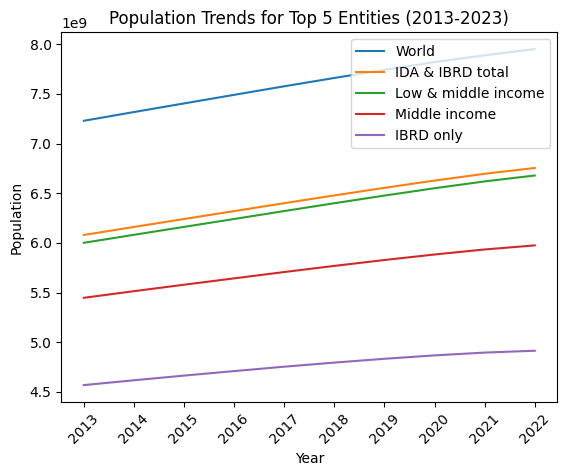

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('API.csv', skiprows=4)

top_5_entities = ['World', 'IDA & IBRD total', 'Low & middle income', 'Middle income', 'IBRD only']

df_top_5 = df[df['Country Name'].isin(top_5_entities)]

years = [str(year) for year in range(2013, 2024)]

plt.figure(facecolor='white')
for entity in top_5_entities:
    plt.plot(years, df_top_5[df_top_5['Country Name'] == entity][years].values.flatten(), label=entity)

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Trends for Top 5 Entities (2013-2023)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

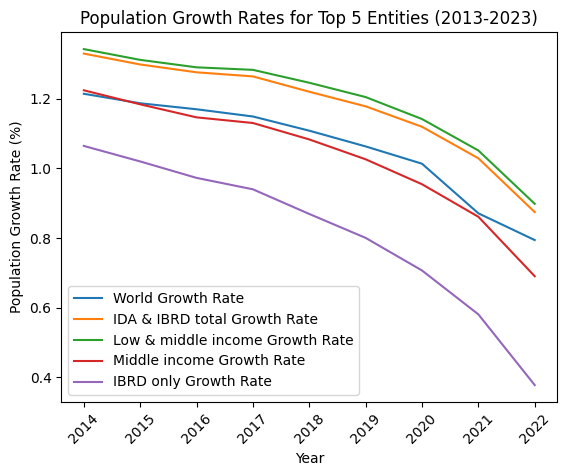

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('API.csv', skiprows=4)

top_5_entities = ['World', 'IDA & IBRD total', 'Low & middle income', 'Middle income', 'IBRD only']

df_top_5 = df[df['Country Name'].isin(top_5_entities)]

years = [str(year) for year in range(2013, 2024)]

growth_rates = {}

for entity in top_5_entities:
    populations = df_top_5[df_top_5['Country Name'] == entity][years].values.flatten()
    growth_rates[entity] = np.diff(populations) / populations[:-1] * 100

plt.figure(facecolor='white')
for entity, rates in growth_rates.items():
    plt.plot(years[1:], rates, label=entity + ' Growth Rate')

plt.xlabel('Year')
plt.ylabel('Population Growth Rate (%)')
plt.title('Population Growth Rates for Top 5 Entities (2013-2023)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

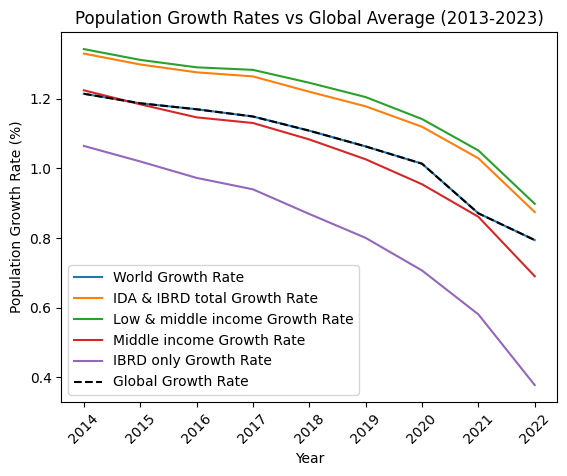

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('API.csv', skiprows=4)

top_5_entities = ['World', 'IDA & IBRD total', 'Low & middle income', 'Middle income', 'IBRD only']

global_population = df[df['Country Name'] == 'World']

years = [str(year) for year in range(2013, 2024)]

global_growth_rate = np.diff(global_population[years].values.flatten()) / global_population[years].values.flatten()[:-1] * 100

df_top_5 = df[df['Country Name'].isin(top_5_entities)]

growth_rates = {}

for entity in top_5_entities:
    populations = df_top_5[df_top_5['Country Name'] == entity][years].values.flatten()
    growth_rates[entity] = np.diff(populations) / populations[:-1] * 100

plt.figure(facecolor='white')
for entity, rates in growth_rates.items():
    plt.plot(years[1:], rates, label=entity + ' Growth Rate')

plt.plot(years[1:], global_growth_rate, label='Global Growth Rate', linestyle='--', color='black')

plt.xlabel('Year')
plt.ylabel('Population Growth Rate (%)')
plt.title('Population Growth Rates vs Global Average (2013-2023)')
plt.legend()
plt.xticks(rotation=45)
plt.show()